Cristina Cicali, Clelia Corridori, Anna Steffinlongo
# Lyapunov Exponent and Out-of-Time-Ordered Correlator’s Growth Rate

In [1]:
#Call of all the libreries needed in the computation. 
from numpy import *
import math
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import random as rand
from OTOCfunc import *
from CGR_LYAPfunc import *

### Computation of the OTOC

In [2]:
#Parameters to compute the Out-Of-Time-Ordered-Correlator OTOC for different values of K
# N is the number for the space/momentum discretization
# T is the period of the kicks  
# K are the different values of the kicking strength. 
# Nkicks is the number of kicks.
# trials: number of trials over which we compute the mean of the fitted CGR
# trials_OTOC: number of trials over which we compute the OTOC
N=2**14
T=2**-7
trials_OTOC=10
trials=10
K=logspace(-2,2,50)
Nkicks=30
Kick=arange(1,Nkicks+1,1)

In [3]:
# Check the correct type of each parameter and its sign if needed.
# N
if (issubclass(type(N),int)):
    ()
else:
    print("Wrong type!")
    print("N is", type(N), ", it must be int!")
    sys.exit()
if (N<0):
    print("N must be greater than 0!")
    sys.exit()

# T
if (issubclass(type(T),int) or issubclass(type(T),float)):
    ()
else:
    print("Wrong type!")
    print("T is", type(T), ", it must be float or int!")
    sys.exit()
if (T<0):
    print("T must be greater than 0!")
    sys.exit()

# K
for kk in K:
    if (issubclass(type(kk),int) or issubclass(type(kk),float)):
        ()
    else:
        print("Wrong type!")
        print("K is", type(kk), ", it must be float or int!")
    if (kk<0):
        print("K must be greater than 0!")
        sys.exit()

# Nkicks
if (issubclass(type(Nkicks),int)):
    ()
else:
    print("Wrong type!")
    print("Nkicks is", type(Nkicks), ", it must be int!")
    sys.exit()
if (Nkicks<0):
    print("Nkicks must be greater than 0!")
    sys.exit()

# trials
if (issubclass(type(trials),int)):
    ()
else:
    print("Wrong type!")
    print("Trials is", type(trials), ", it must be int!")
    sys.exit()
if (trials<0):
    print("Trials must be greater than 0!")
    sys.exit()
    
# trials_OTOC
if (issubclass(type(trials_OTOC),int)):
    ()
else:
    print("Wrong type!")
    print("trials_OTOC is", type(trials_OTOC), ", it must be int!")
    sys.exit()
if (trials_OTOC<0):
    print("trials_OTOC must be greater than 0!")
    sys.exit()

# NT relation check
if(N*T<2**7 or N*T>2**16):
    print("N*T out of range! Using T=2**-7 and N=2**14 instead.")
    N=2**14
    T=2**-7

In [ ]:
mean_C=zeros([Nkicks,len(K),trials])
for kk in range(trials):
    mean_C[:,:,kk]=mean_otoc(N,T,K,Nkicks,trials_OTOC,True)

In [4]:
#Due to the time needed for the computation of the OTOC we saved the data in a txt file in order to only load
#the file when needed
# Set saveF=True to save the file
saveF=False
if saveF==True:
    with open('OTOC_10trials_10Mean-EXP.txt', 'w') as out:
        for line in mean_C:
            savetxt(out, line)


In [2]:
# To load data from a txt file set load=True
load=True
if load==True:
    # The value selected here must be the same of the quantities above chosen for the saved file!
    N=2**14
    T=2**-7
    trials=10
    K=logspace(-2,2,50)
    Nkicks=30
    Kick=arange(1,Nkicks+1,1)

    data = loadtxt("OTOC_10trials_10Mean-EXP.txt", comments="#", delimiter=" ", unpack=False)
    mean_C=reshape(data.astype(float),(Nkicks,len(K),trials))

### Quantum CGR

In [3]:
#Computation of the correlator growth rate using the function quantumCGR_fit contained in the file CGR_LYAPfunc.py
CGR_Q=quantumCGR_fit(Kick, K, mean_C)


C:\Users\cleli\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


### Quantum CGR with fit approach

In [4]:

def func(t,a,l):
    return a*exp(2*l*(t-1))

def func_lin(t,a,b):
    return a+b*t

In [5]:
#computation of lambda from the OTOC fit
l_fit=zeros(len(K))
for kk in range(len(K)):
    if (kk<8):
        ii=2
        jj=29
    if (kk<11 and kk>=8):
        ii=2
        jj=23
    if (kk<14 and kk>=11):
        ii=2
        jj=19
    if (kk>=14 and kk<21):
        ii=2
        jj=16
    if kk==15:
        ii=2
        jj=15
    if kk==16:
        ii=2
        jj=14
    if kk==17:
        ii=2
        jj=13
    if kk==18:
        ii=2
        jj=12
    if kk==18:
        ii=2
        jj=11
    if kk==19:
        ii=2
        jj=10
    if kk==20:
        ii=2
        jj=9
    if kk==21:
        ii=1
        jj=8
    if (kk>=22 and kk<27):
        ii=1
        jj=6
    if (kk>=27 and kk<32):
        ii=1
        jj=5
    if (kk==32 and kk==34):
        ii=0
        jj=4
    if (kk>=35 and kk<43):
        ii=0
        jj=3
    if (kk>=43 and kk<46):
        ii=0
        jj=2
    if (kk>=46 and kk<50):
        ii=0
        jj=2
    popt, cov = curve_fit(func_lin, Kick[ii:jj], log10(mean_C[ii:jj,kk,0]))
    l_fit[kk]=popt[1]
    

### Classical CGR numerically computed

In [6]:
#Computation of the classical Correlator growth rate. We have choosen also in this case a number of kicks and
#a number of trials on mediate. Also in this we choose a displacement and the initial conditions from a random 
#uniform distribution between 0 and 2*pi. The classical CGR is computed following the equation ????????.

Nkicks=50
trials=1000
dxi=10**(-12)
dpi=10**(-12)

CGR_c=zeros(len(K))
for kk in range(0,len(K)):
    dp2=zeros([Nkicks,trials])
    for ii in range(trials):
        x_i=rand.uniform(0,2*pi)
        p_i=rand.uniform(0,2*pi)
        dp2[:,ii] = map_kr_CGR(x_i, p_i, dxi, dpi, Nkicks, K[kk])
    dp2mean=mean(dp2,1)
    
    dp2meanShift=insert(dp2mean, 0, 0)
    dp2meanShift=delete(dp2meanShift, -1)

    ratio= log(dp2mean[2:]/dp2meanShift[2:])
    
    CGR_c[kk]=(1/(2*(Nkicks-1)))*sum(ratio)


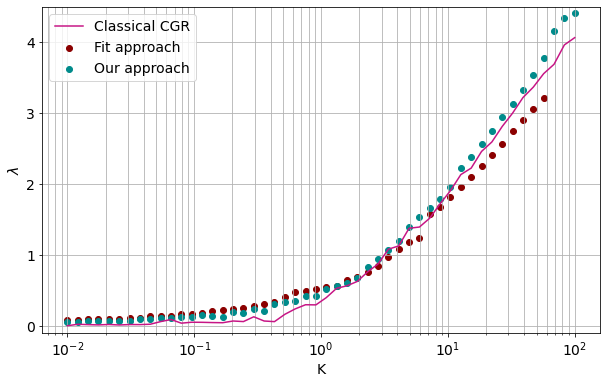

In [9]:
plt.figure(figsize=(10,6))
plt.xscale('log')

# Quantum CGR with fit approach
plt.scatter(K,l_fit, label='Fit approach', color='darkred')

# Quantum CGR with our approach
plt.scatter(K[:],CGR_Q[:], label='Our approach', color='darkcyan')

# Classical CGR
plt.plot(K, CGR_c, label='Classical CGR',color='mediumvioletred')

plt.legend(fontsize=14)
plt.ylim([-0.1,4.5])
plt.xlabel('K', size=14)
plt.ylabel('$\lambda$', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(True, which="both")
plt.savefig('CGRandLEFIT.png', dpi=100)

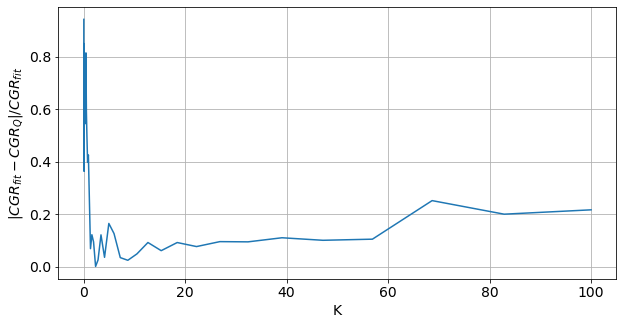

In [10]:
# differences between the CGR for the CKR and the quantum CGR, divided by the quantum CGR. computations with fit approach
differencesCGR=abs(l_fit-CGR_c)/l_fit

plt.figure(figsize=(10,5))
# plt.yscale('log')
plt.plot(K,differencesCGR)

plt.xlabel('K', size=14)
plt.ylabel('$|CGR_{fit}-CGR_Q|/CGR_{fit}$', size=14)
plt.xticks(size=14)
plt.yticks(size=14)

plt.grid(True, which="both")
plt.savefig('diff_CGRc_FIT.png', dpi=100)

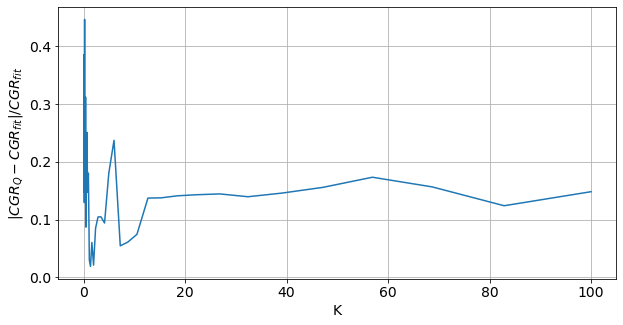

In [11]:
# Here we observe the differences between the CGR computed with the two approaches
differencesCGR=abs(l_fit-CGR_Q)/l_fit

plt.figure(figsize=(10,5))
# plt.yscale('log')
plt.plot(K,differencesCGR)

plt.xlabel('K', size=14)
plt.ylabel('$|CGR_Q-CGR_{fit}|/CGR_{fit}$', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(True, which="both")
plt.savefig('diff_approaches_FIT_.png', dpi=100)